#Project Name : Mental Health in Tech Survey

#Auhtor : Mustapha Ait Ichou

#Institution :  Faculty of Sciences Rabat


 * Develop a machine learning model to predict the mental health status of individuals working in the tech industry based on survey responses. This project aims to identify factors influencing mental health and provide insights for supporting mental well-being in the workplace.




In [28]:
import pandas as pd


data = 'survey.csv'
df = pd.read_csv(data)



#Kindly perform an initial review of the data structure for a rapid overview

In [29]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [31]:
df.shape

(1259, 27)

In [32]:
# Summary statistics for numerical columns
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


# Check for missing values in each column


In [33]:
if df.isna().values.any() == True:
    print(f'the dataframe contain null values, needs cleaning')
else:
    print(f'the dataframe does not contain any null values, do not need cleaning')

the dataframe contain null values, needs cleaning


In [34]:

df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [35]:
df.work_interfere.isna().sum()
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [36]:
df.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [37]:
df.self_employed.fillna(value='No', inplace=True)
df.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [38]:
df.state.fillna(value='Unknown', inplace=True)
df.state.unique()

array(['IL', 'IN', 'Unknown', 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD',
       'NY', 'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL',
       'MN', 'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA',
       'NH', 'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI',
       'WY', 'LA', 'ME'], dtype=object)

In [39]:
df.isna().values.any()

True

In [40]:
###Gender Solution
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [41]:
repGen={'Female':'Female','M':'Male','male':'Male','Male':'Male','m':'Male','Male-ish':'Others','maile':'Male','Trans-female':'Others',
        'Cis Female':'Female','F':'Female','something kinda male?':'Others','Cis Male':'Male','Woman':'Female','f':'Female','Mal':'Male',
        'Male (CIS)':'Male','queer/she/they':'Others','non-binary':'Others','Femake':'Female','woman':'Female','Make':'Male','Nah':'Others',
        'All':'Others','Enby':'Others','fluid':'Others','Genderqueer':'Others','Female ':'Female','Androgyne':'Others','Agender':'Others',
        'cis-female/femme':'Female','Guy (-ish) ^_^':'Others','male leaning androgynous':'Others','Male ':'Male','Man':'Male','Trans woman':'Others',
        'msle':'Male','Neuter':'Others','Female (trans)':'Female','queer':'Others','Female (cis)':'Female','Mail':'Male','cis male':'Male',
        'Malr':'Male','female':'Female','p':'Others','A little about you':'Others','femail':'Female','Cis Man':'Male',
        'ostensibly male, unsure what that really means':'Others'}
df['Gender']=df.Gender.replace(repGen)
df.Gender.unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [42]:
#Counte Gender
gender_values = df.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
gender_values

,count
Male,990
Female,249
Others,20


#Timestamp splitting into date, time

In [43]:
df.Timestamp

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [44]:
'2014-08-27 11:29:31'.split(' ')

['2014-08-27', '11:29:31']

In [45]:
Timestamp_split=df['Timestamp'].str.split(' ')
Timestamp_split

0       [2014-08-27, 11:29:31]
1       [2014-08-27, 11:29:37]
2       [2014-08-27, 11:29:44]
3       [2014-08-27, 11:29:46]
4       [2014-08-27, 11:30:22]
                 ...          
1254    [2015-09-12, 11:17:21]
1255    [2015-09-26, 01:07:35]
1256    [2015-11-07, 12:36:58]
1257    [2015-11-30, 21:25:06]
1258    [2016-02-01, 23:04:31]
Name: Timestamp, Length: 1259, dtype: object

In [46]:
Timestamp_split[0][0]

'2014-08-27'

In [47]:
Timestamp_split.str.get(0)

0       2014-08-27
1       2014-08-27
2       2014-08-27
3       2014-08-27
4       2014-08-27
           ...    
1254    2015-09-12
1255    2015-09-26
1256    2015-11-07
1257    2015-11-30
1258    2016-02-01
Name: Timestamp, Length: 1259, dtype: object

In [48]:
df['Date']=Timestamp_split.str.get(0)
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%d-%m-%Y")
df.Date
##Date table inserted and formated from yyyy-mm-dd into dd-mm-yyyy

0       27-08-2014
1       27-08-2014
2       27-08-2014
3       27-08-2014
4       27-08-2014
           ...    
1254    12-09-2015
1255    26-09-2015
1256    07-11-2015
1257    30-11-2015
1258    01-02-2016
Name: Date, Length: 1259, dtype: object

In [49]:
df['Time']=Timestamp_split.str.get(1)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date,Time
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,27-08-2014,11:29:31
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,NaN,27-08-2014,11:29:37
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,No,No,No,Rarely,6-25,...,No,Yes,Yes,Yes,Yes,No,No,NaN,27-08-2014,11:29:44
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,No,Yes,Yes,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,27-08-2014,11:29:46
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,27-08-2014,11:30:22


In [50]:
Date_split=df['Date'].str.split('-')
df['Year']=Date_split.str.get(2)
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date,Time,Year
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Some of them,Yes,No,Maybe,Yes,No,NaN,27-08-2014,11:29:31,2014
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,No,No,No,No,Don't know,No,NaN,27-08-2014,11:29:37,2014


In [51]:
Date_split=df['Date'].str.split('-')
df['Year']=Date_split.str.get(2)
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date,Time,Year
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Some of them,Yes,No,Maybe,Yes,No,NaN,27-08-2014,11:29:31,2014
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,No,No,No,No,Don't know,No,NaN,27-08-2014,11:29:37,2014


# Unique values in categorical columns

In [52]:

print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")


Unique Values in Categorical Columns:
Timestamp: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Gender: ['Female' 'Male' 'Others']
Country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']
state: ['IL' 'IN' 'Unknown' 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA'
 'IA' 'PA' 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC'
 'NE' 'WV' 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID'
 'MS'

# Example: Handling missing values by filling them with the mean

In [53]:

df.fillna(df.mean(), inplace=True)

<ipython-input-53-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


#Pop out unneccassry variables

In [54]:
df=df.drop(['comments'],axis=1)

#Checking for duplications

In [55]:
print(f'duplication in the dataframe is {sum(df.duplicated())}')

duplication in the dataframe is 0


#Relationship between variables

Text(0, 0.5, 'Number of Respondents')

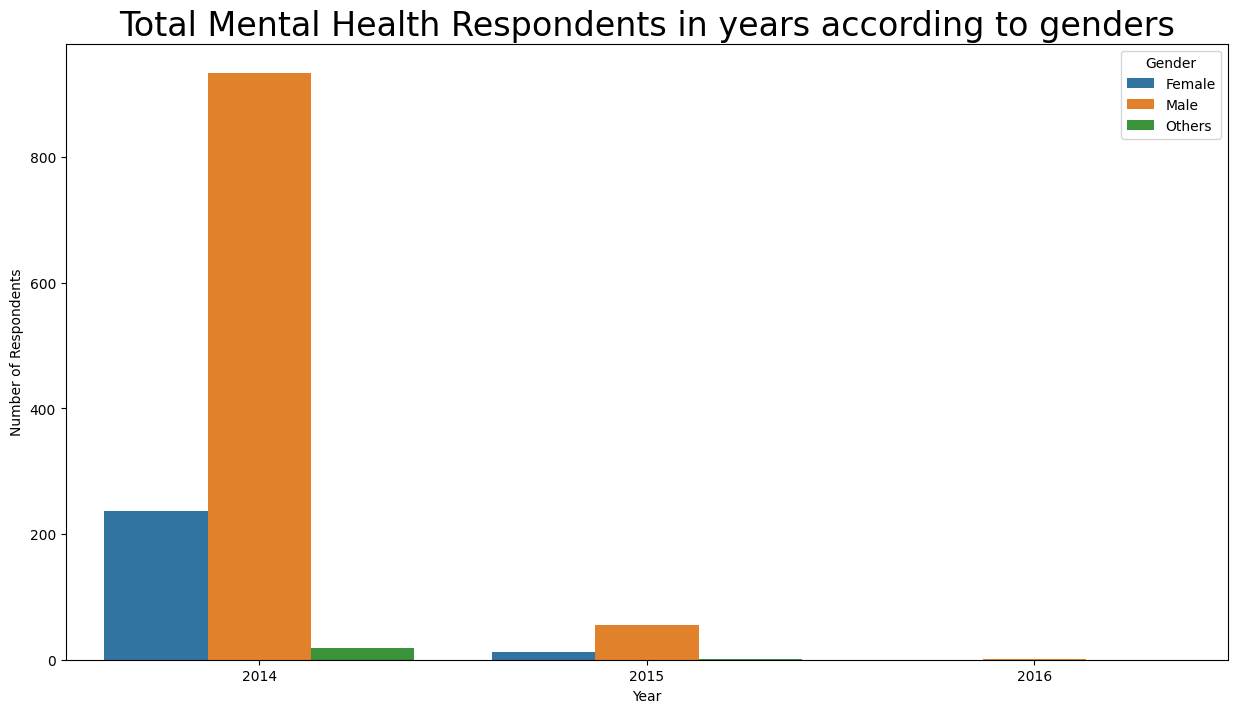

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you are using seaborn for visualization

plt.figure(figsize = (15,8))
bar1=sns.countplot(x='Year', data=df, hue='Gender')
bar1.set_title('Total Mental Health Respondents in years according to genders',fontsize=24)
bar1.set_ylabel('Number of Respondents')

In [59]:
(df.Year == '2016').sum()

1

In [61]:
print(f'The total data in the year 2016 is {(df.Year == "2016").sum()} .')

The total data in the year 2016 is 1 .


In [63]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
Date                         object
Time                        

Axes(0.125,0.11;0.775x0.77)


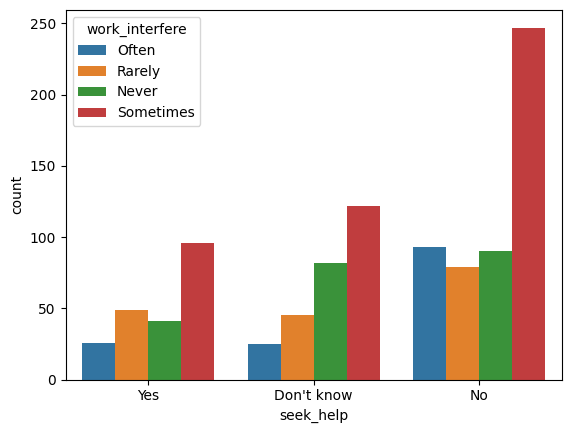

In [64]:
#visualize the distribution of 'seek_help' categories, with differentiation by 'work_interfere' categories shown in different colors.

print(sns.countplot(x='seek_help',data=df,hue='work_interfere'))

Axes(0.125,0.11;0.775x0.77)


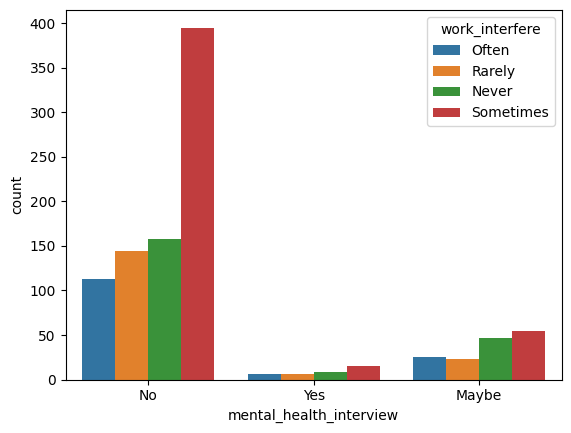

In [65]:
print(sns.countplot(x='mental_health_interview',data=df,hue='work_interfere'))

Text(0.5, 0, 'Seeking Help')

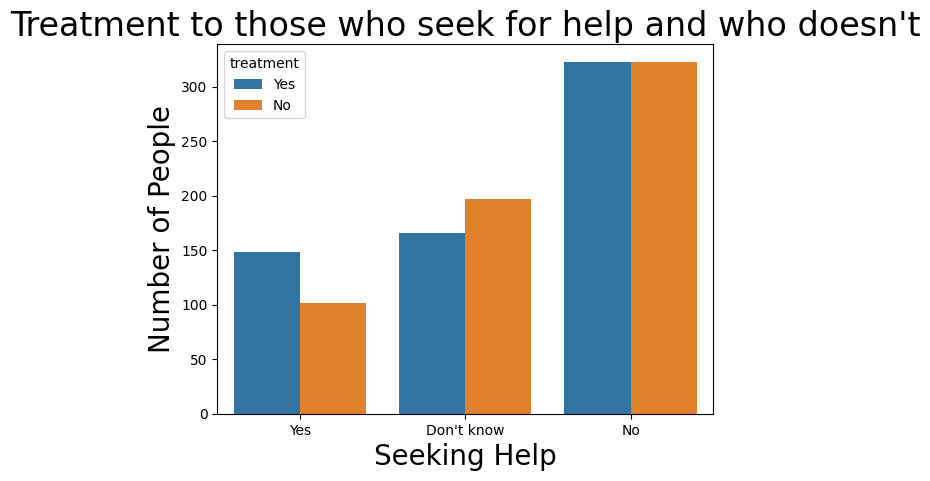

In [66]:
bar4=sns.countplot(x='seek_help',data=df,hue='treatment')
bar4.set_title("Treatment to those who seek for help and who doesn't",fontsize = 24)
bar4.set_ylabel('Number of People',fontsize = 20)
bar4.set_xlabel('Seeking Help',fontsize = 20)

In [67]:
sh_values = df.seek_help.value_counts().sort_values(ascending=False).to_frame()
sh_values = sh_values.rename(columns={'Seek Help': 'count'})
sh_values

,seek_help
No,646
Don't know,363
Yes,250


Text(0.5, 0, 'Well Program')

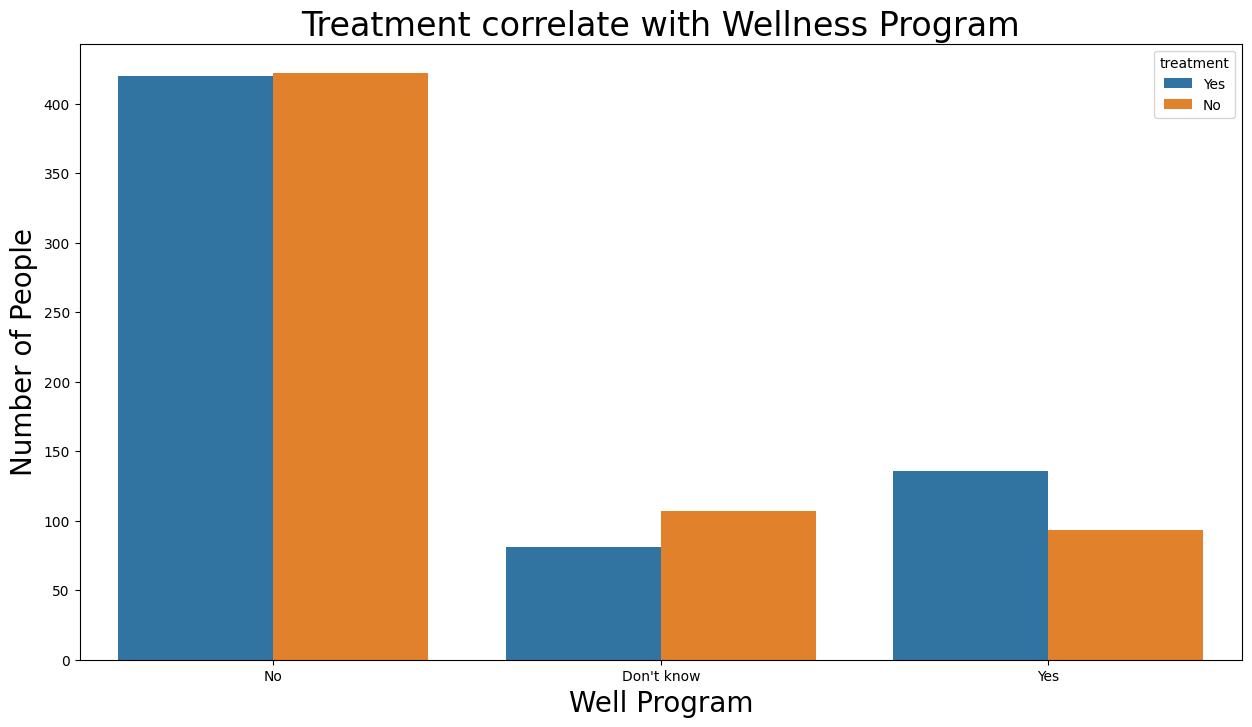

In [68]:
plt.figure(figsize = (15,8))
bar5=sns.countplot(x='wellness_program',data=df,hue='treatment')
bar5.set_title("Treatment correlate with Wellness Program",fontsize = 24)
bar5.set_ylabel('Number of People',fontsize = 20)
bar5.set_xlabel('Well Program',fontsize = 20)